<a href="https://colab.research.google.com/github/hirajya/Customer-Churn-Prediction-using-ANN/blob/main/(Bank_Turnover)_Customer_Churn_Prediction_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Bank Turnover) Customer Churn Prediction using ANN
- link of dataset: https://www.kaggle.com/datasets/barelydedicated/bank-customer-churn-modeling

### Importing libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [55]:
path = '/content/drive/MyDrive/datasets/Churn_Modelling.csv'

df = pd.read_csv(path)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Cleaning

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [57]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [58]:
df.shape

(10000, 14)

In [59]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [60]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

removing the rownumber, customerid, & surname column for they are personal details and may serve as a noise to our model.

removing the geography for it may introduce bias in terms of just location

In [61]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


### Exploratory Data Analysis(EDA)

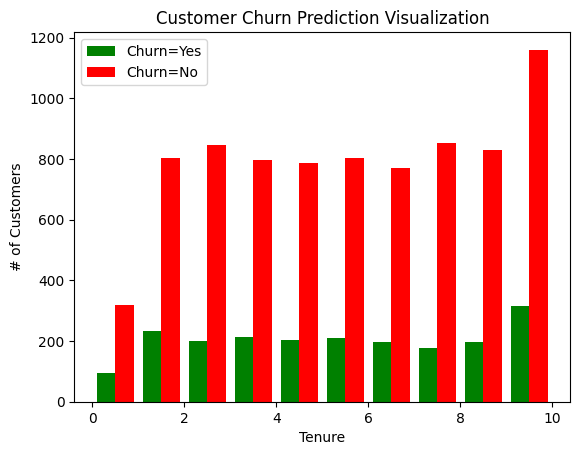

In [62]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("Tenure")
plt.ylabel("# of Customers")
plt.title("Customer Churn Prediction Visualization")

plt.hist([tenure_churn_yes, tenure_churn_no], color=['green', 'red'], label=['Churn=Yes', 'Churn=No'])
plt.legend()


(array([  19.,  166.,  447.,  958., 1444., 1866., 1952., 1525.,  968.,
         655.]),
 array([350., 400., 450., 500., 550., 600., 650., 700., 750., 800., 850.]),
 <BarContainer object of 10 artists>)

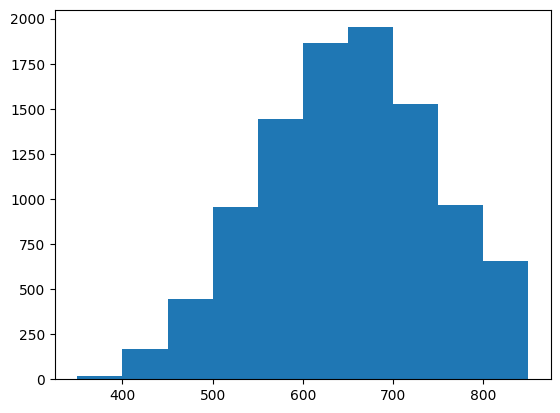

In [63]:
plt.hist(df['CreditScore'])

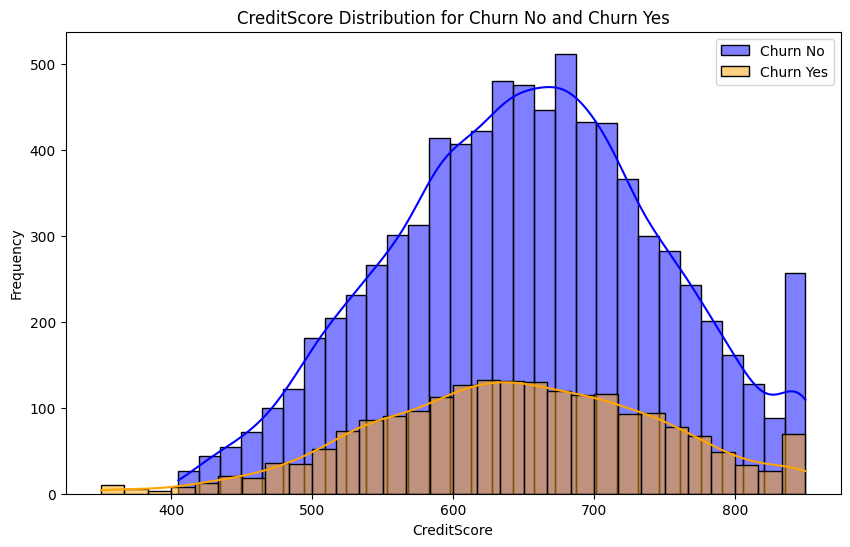

In [64]:
import seaborn as sns

creditscore_churn_no = df[df.Exited == 0].CreditScore
creditscore_churn_yes = df[df.Exited == 1].CreditScore

plt.figure(figsize=(10, 6))

sns.histplot(creditscore_churn_no, bins=30, color='blue', label='Churn No', kde=True)
sns.histplot(creditscore_churn_yes, bins=30, color='orange', label='Churn Yes', kde=True)

plt.xlabel('CreditScore')
plt.ylabel('Frequency')
plt.title('CreditScore Distribution for Churn No and Churn Yes')
plt.legend()

plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


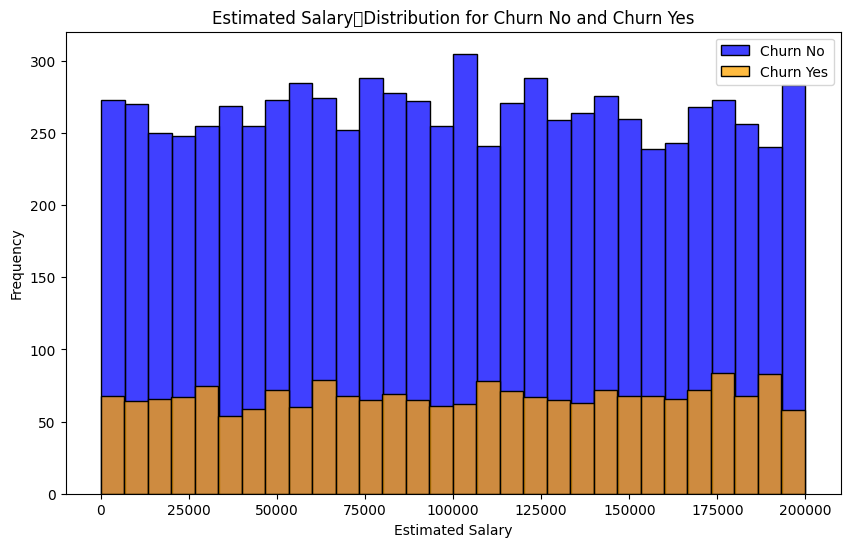

In [65]:
ES_churn_no = df[df.Exited == 0].EstimatedSalary
ES_churn_yes = df[df.Exited == 1].EstimatedSalary

plt.figure(figsize=(10, 6))

sns.histplot(ES_churn_no, bins=30, color='blue', label='Churn No')
sns.histplot(ES_churn_yes, bins=30, color='orange', label='Churn Yes')

plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Estimated Salary	Distribution for Churn No and Churn Yes')
plt.legend()

plt.show()

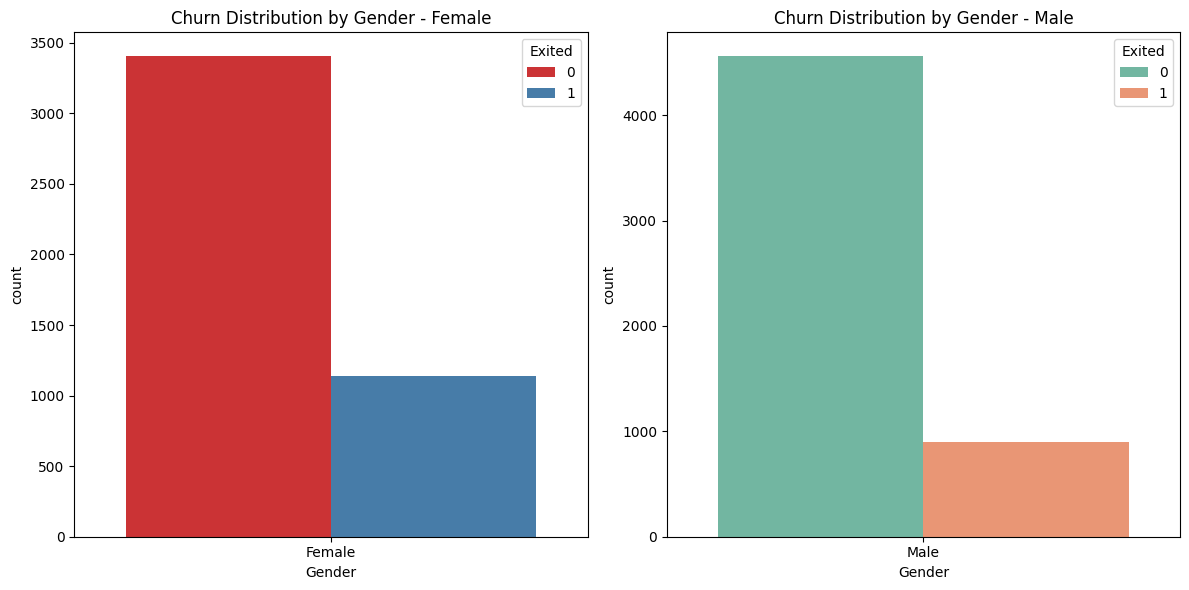

In [66]:
F_churn_no = df[(df.Exited == 0) & (df.Gender == 'Female')]
F_churn_yes = df[(df.Exited == 1) & (df.Gender == 'Female')]

M_churn_no = df[(df.Exited == 0) & (df.Gender == 'Male')]
M_churn_yes = df[(df.Exited == 1) & (df.Gender == 'Male')]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Gender', hue='Exited', data=pd.concat([F_churn_no, F_churn_yes]), palette='Set1')
plt.title('Churn Distribution by Gender - Female')

plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='Exited', data=pd.concat([M_churn_no, M_churn_yes]), palette='Set2')
plt.title('Churn Distribution by Gender - Male')

plt.tight_layout()

plt.show()


### Data Processing

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  object 
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 781.4+ KB


In [68]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0


In [69]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [70]:
# scaling values
from sklearn.preprocessing import MinMaxScaler

cols_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaler = MinMaxScaler()

df2 = df.copy()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

df2.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0,0.324324,0.2,0.000000,1,1,1,0.506735,1
1,0.516,0,0.310811,0.1,0.334031,1,0,1,0.562709,0
2,0.304,0,0.324324,0.8,0.636357,3,1,0,0.569654,1
3,0.698,0,0.283784,0.1,0.000000,2,0,0,0.469120,0
4,1.000,0,0.337838,0.2,0.500246,1,1,1,0.395400,0


In [71]:
df2 = pd.get_dummies(data=df2, columns=['NumOfProducts'])
df2.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'NumOfProducts_1',
       'NumOfProducts_2', 'NumOfProducts_3', 'NumOfProducts_4'],
      dtype='object')

In [72]:
for cols in df2:
  print(f"{cols}: {df2[cols].unique()}")

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [73]:
df2.shape

(10000, 13)

In [74]:
X = df2.drop('Exited', axis=1)
y = df2['Exited']

In [75]:
X[:5]

,CreditScore,Gender,Age,Tenure,Balance,HasCrCard,IsActiveMember,EstimatedSalary,NumOfProducts_1,NumOfProducts_2,NumOfProducts_3,NumOfProducts_4
0,0.538,0,0.324324,0.2,0.000000,1,1,0.506735,1,0,0,0
1,0.516,0,0.310811,0.1,0.334031,0,1,0.562709,1,0,0,0
2,0.304,0,0.324324,0.8,0.636357,1,0,0.569654,0,0,1,0
3,0.698,0,0.283784,0.1,0.000000,0,0,0.469120,0,1,0,0
4,1.000,0,0.337838,0.2,0.500246,1,1,0.395400,1,0,0,0


In [76]:
y[:5]

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
X_train.shape

(8000, 12)

In [79]:
X_test.shape

(2000, 12)

In [80]:
len(X_train.columns)

12

### Model Training

In [81]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dense(5, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.6627 - accuracy: 0.7456
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.6090 - accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5288 - accuracy: 0.8144
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.8239
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4689 - accuracy: 0.8313
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4502 - accuracy: 0.8364
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8409
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4248 - accuracy: 0.8436
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4164 - accura

In [82]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8590


[0.38431188464164734, 0.859000027179718]

In [94]:
yp = model.predict(X_test)
yp[:20]

63/63 [==============================] - 0s 2ms/step


array([[0.10672456],
       [0.10672456],
       [0.10672456],
       [0.10672456],
       [0.10672456],
       [0.10672456],
       [0.1639387 ],
       [0.10672456],
       [0.3018396 ],
       [0.10672456],
       [0.93250245],
       [0.92982227],
       [0.63021   ],
       [0.31275678],
       [0.10672456],
       [0.11945565],
       [0.10672456],
       [0.10672456],
       [0.10672456],
       [0.10672456]], dtype=float32)

In [105]:
y_test[:5]

6252    0
4684    0
1731    0
4742    0
4521    0
Name: Exited, dtype: int64

In [96]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [106]:
y_pred[:5]

[0, 0, 0, 0, 0]

In [100]:
df2.iloc[6412]

CreditScore        0.504000
Gender             0.000000
Age                0.472973
Tenure             0.500000
Balance            0.391668
HasCrCard          0.000000
IsActiveMember     1.000000
EstimatedSalary    0.225155
Exited             1.000000
NumOfProducts_1    1.000000
NumOfProducts_2    0.000000
NumOfProducts_3    0.000000
NumOfProducts_4    0.000000
Name: 6412, dtype: float64

In [107]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1607
           1       0.81      0.37      0.51       393

    accuracy                           0.86      2000
   macro avg       0.84      0.67      0.71      2000
weighted avg       0.85      0.86      0.84      2000



In [108]:
print(tf.math.confusion_matrix(labels=y_test, predictions=y_pred))

tf.Tensor(
[[1572   35]
 [ 247  146]], shape=(2, 2), dtype=int32)


Text(95.72222222222221, 0.5, 'Truth')

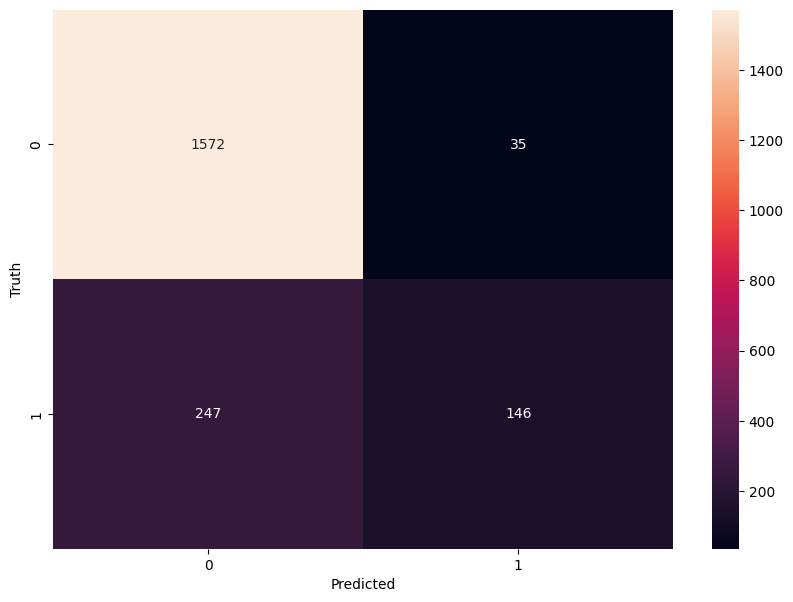

In [109]:
import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')